# Tutorial 4 - Dominio de la frecuencia

En este tutorial veremos algunos conceptos relacionados con el dominio de la frecuencia en 1D y 2D. En particular, los temas a tratar son:

- Muestreo en 1D
- Transformada de Fourier en 1D
- Filtros pasabajos en 1D
- Transformada de Fourier en 2D
- Filtros pasabajo en 2D

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Muestreo 1D

## Muestreo de frecuencia baja

In [2]:
x_min = 0
x_max = 3
n_samples = 50 
x_delta = (x_max - x_min) / n_samples

# Definir el muestreo de puntos
x = np.linspace(x_min,x_max,n_samples)

# Definir función a ser muestreada
freq_1 = 1
freq_2 = 3
y = np.cos(2*np.pi*x * freq_1) + 0.5 * np.cos(2*np.pi*x * freq_2)

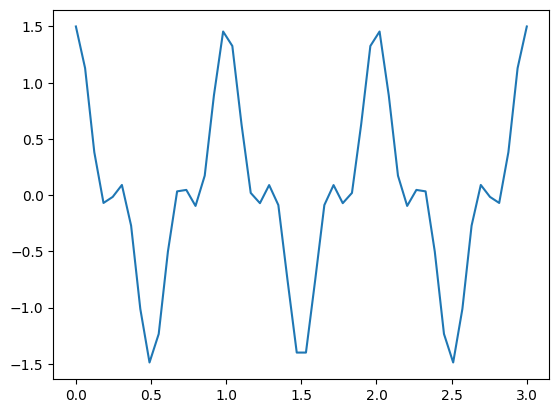

In [3]:
plt.plot(x,y)

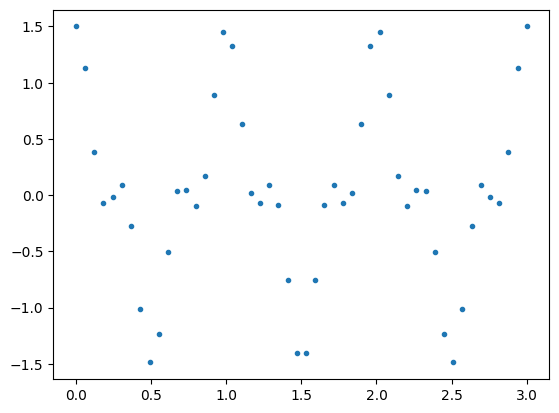

In [4]:
plt.plot(x,y, '.')

In [5]:
# Transformada de fourier de nuestra funcion
fft_y = np.fft.fft(y)
fft_y[:10]

array([ 1.5       +0.j        ,  1.62123952+0.10199974j,
        2.24602601+0.28373907j, 25.20566694+4.80823812j,
       -0.76260773-0.19580438j,  0.10524174+0.03419511j,
        0.47444216+0.18784494j,  0.84066102+0.39558505j,
        1.60048152+0.87987216j, 10.00093291+6.34678502j])

In [6]:
freq_magnitude = np.abs(fft_y)
freq_magnitude[:10]

array([ 1.5       ,  1.62444499,  2.26387736, 25.66017926,  0.78734357,
        0.11065771,  0.5102755 ,  0.92908475,  1.82639429, 11.84484441])

In [7]:
# Obtener las frecuencias correspondientes a cada entrada
freq = np.fft.fftfreq(fft_y.shape[0], d=x_delta)
freq[:10]

array([0.        , 0.33333333, 0.66666667, 1.        , 1.33333333,
       1.66666667, 2.        , 2.33333333, 2.66666667, 3.        ])

(-6.0, 6.0)

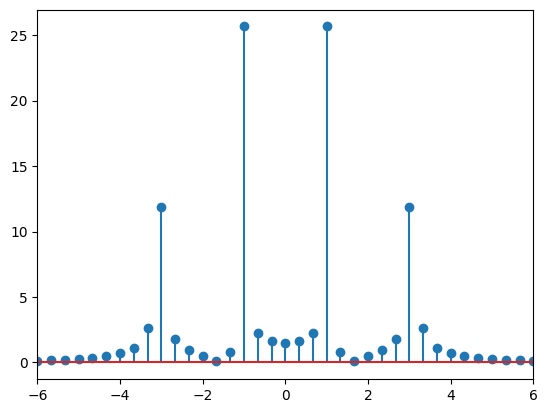

In [8]:
plt.stem(freq, freq_magnitude)
plt.xlim(-6, 6)

## Muestreo de frecuencia alta

In [9]:
x_min = 0
x_max = 3
n_samples = 1000 
x_delta = (x_max - x_min) / n_samples

# Definir el muestreo de puntos
x = np.linspace(x_min,x_max,n_samples)

# Definir función a ser muestreada
freq_1 = 1
freq_2 = 3
y = np.cos(2*np.pi*x * freq_1) + 0.5 * np.cos(2*np.pi*x * freq_2)

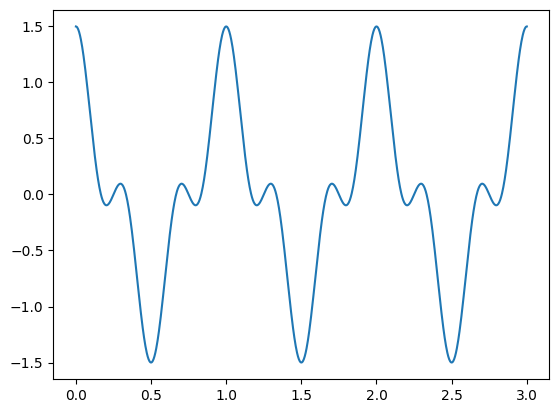

In [10]:
plt.plot(x,y)

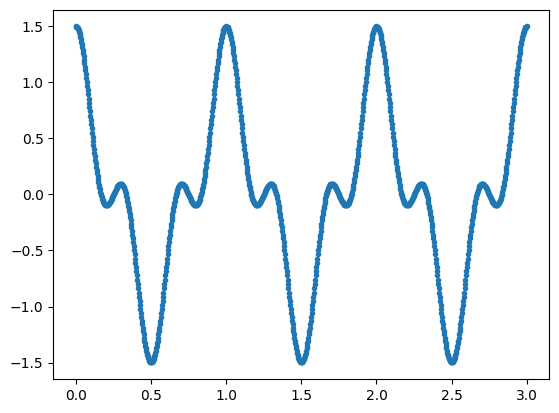

In [11]:
plt.plot(x,y, '.')

(-6.0, 6.0)

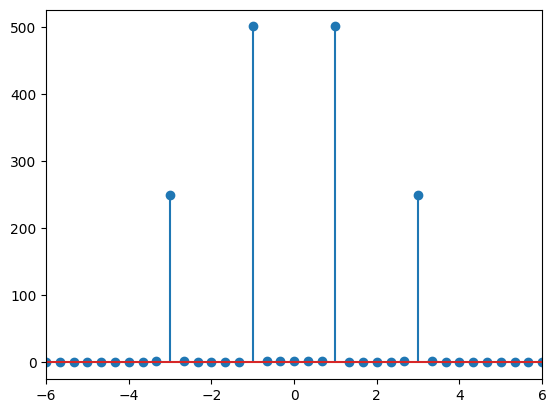

In [12]:
# Transformada de fourier de nuestra funcion
fft_y = np.fft.fft(y)
freq_magnitude = np.abs(fft_y)

# Obtener las frecuencias correspondientes a cada entrada
freq = np.fft.fftfreq(fft_y.shape[0], d=x_delta)

plt.stem(freq, freq_magnitude)
plt.xlim(-6, 6)

# Filtro pasabajo 1D

In [13]:
x_min = 0
x_max = 5
n_samples = 1000 
x_delta = (x_max - x_min) / n_samples

# Definir el muestreo de puntos
x = np.linspace(x_min,x_max,n_samples)

# Definir función a ser muestreada
y = (1 < x) & (x < 3) * 1

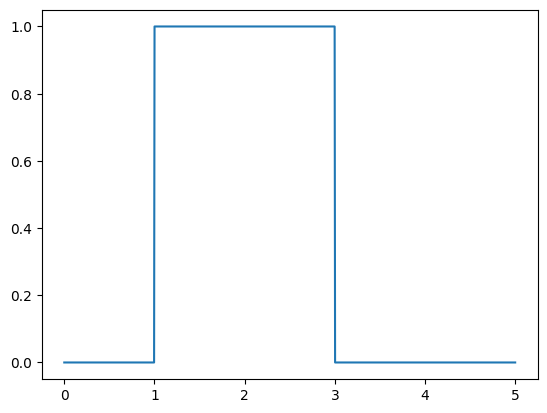

In [14]:
plt.plot(x,y)

(-15.0, 15.0)

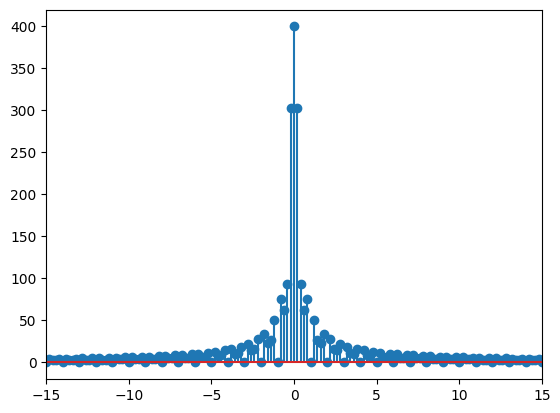

In [15]:
# Transformada de fourier de nuestra funcion
fft_y = np.fft.fft(y)
freq_magnitude = np.abs(fft_y)

# Obtener las frecuencias correspondientes a cada entrada
freq = np.fft.fftfreq(fft_y.shape[0], d=x_delta)

plt.stem(freq, freq_magnitude)
plt.xlim(-15, 15)

(-15.0, 15.0)

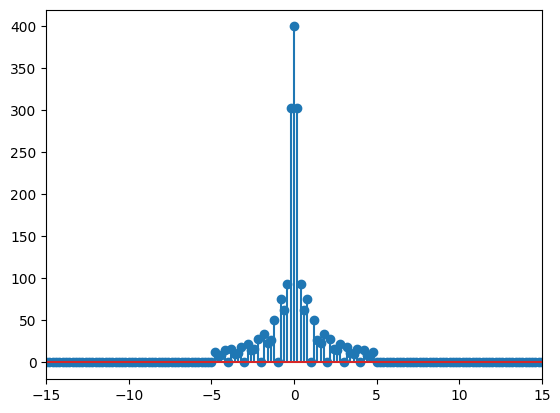

In [16]:
filtered_fft_y = fft_y.copy()
filtered_fft_y[np.abs(freq) > 5] = 0

plt.stem(freq, np.abs(filtered_fft_y))
plt.xlim(-15, 15)

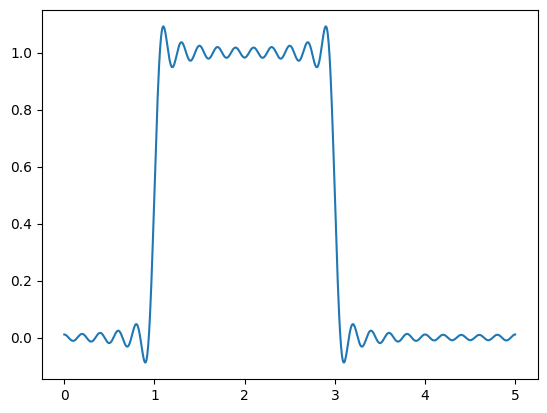

In [17]:
y_pasabajo = np.real(np.fft.ifft(filtered_fft_y))
plt.plot(x,y_pasabajo)

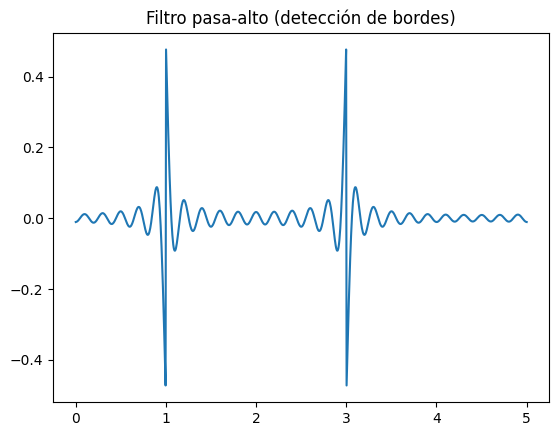

In [18]:
y_pasaalto = y - y_pasabajo

plt.title('Filtro pasa-alto (detección de bordes)')
plt.plot(x, y_pasaalto)

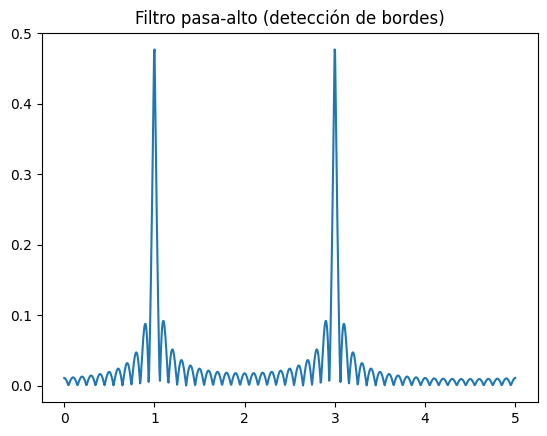

In [19]:
diff = np.abs(y - y_pasabajo)

plt.title('Filtro pasa-alto (detección de bordes)')
plt.plot(x, diff)

# Pasabajo 2D

landscape = cv2.imread('landscape.jpeg', cv2.IMREAD_GRAYSCALE)
plt.imshow(landscape, cmap='gray')

## Transformada de Fourier en 2D

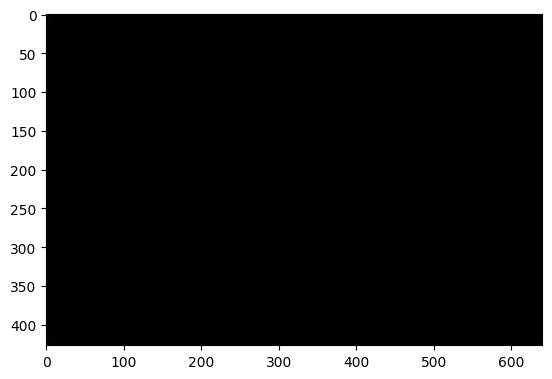

In [25]:
landscape_fft = np.fft.fft2(landscape)
magnitudes = np.abs(landscape_fft)

plt.imshow(magnitudes, cmap='gray')

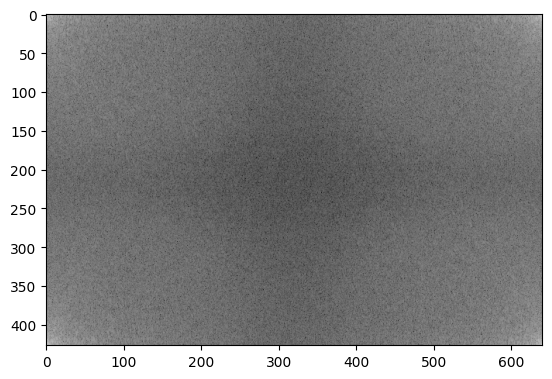

In [26]:
log_magnitudes = np.log(np.abs(landscape_fft))
plt.imshow(log_magnitudes, cmap='gray')

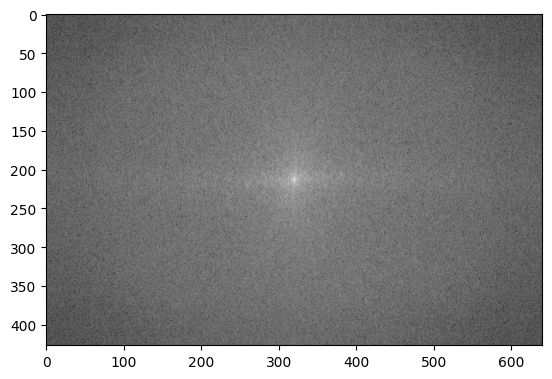

In [27]:
shifted_landscape_fft = np.fft.fftshift(landscape_fft)

plt.imshow(np.log(np.abs(shifted_landscape_fft)), cmap='gray')

## Filtro pasabajo en 2D

Ahora crearemos una máscara simple para filtrar las frecuencias altas. Esto lo haremos 

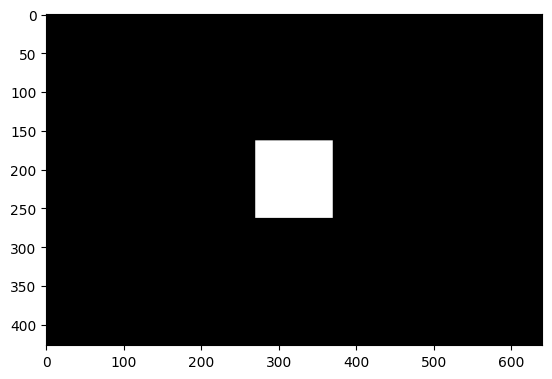

In [28]:
center_y, center_x = shifted_landscape_fft.shape[0] // 2, shifted_landscape_fft.shape[1] // 2
mask_width, mask_height = 100, 100

freq_mask = np.zeros(shifted_landscape_fft.shape)
freq_mask[center_y-mask_height//2:center_y+mask_height//2, center_x-mask_width//2:center_x+mask_width//2] = 1
plt.imshow(freq_mask, cmap='gray')

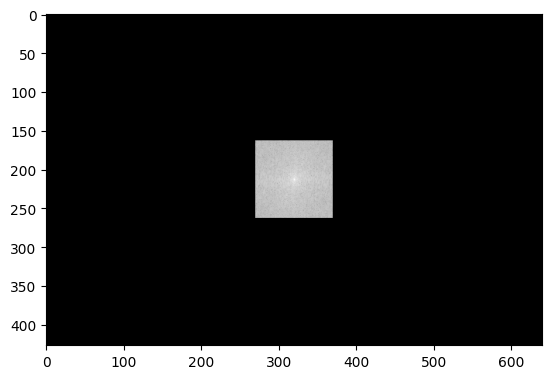

In [29]:
# Filtrar imagen
filtered_fft = shifted_landscape_fft * freq_mask
plt.imshow(np.log(np.abs(filtered_fft) +0.00001), cmap='gray')

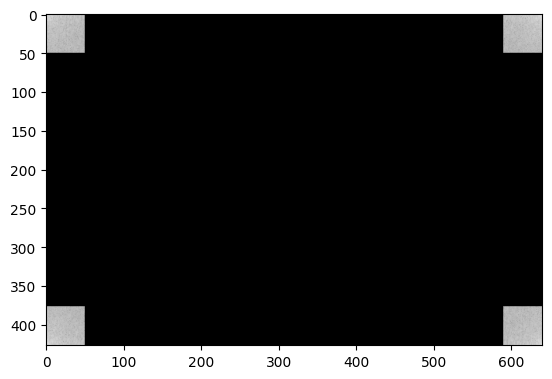

In [30]:
# Des-centrar la transformada de Fourier
unshifted_filtered_fft = np.fft.ifftshift(filtered_fft)
plt.imshow(np.log(np.abs(unshifted_filtered_fft) + 0.0001), cmap='gray')

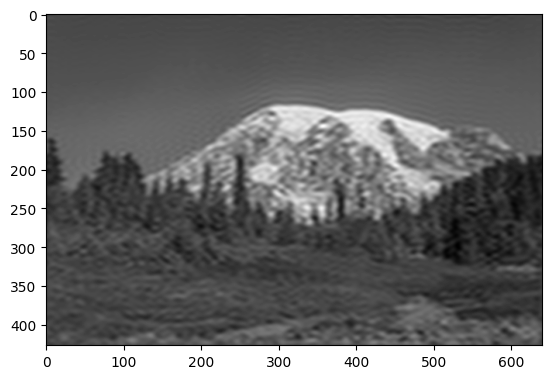

In [31]:
# Aplicar transformada inversa (y obtener componente real)
reconstructed_landscape = np.real(np.fft.ifft2(unshifted_filtered_fft))
plt.imshow(reconstructed_landscape, cmap='gray')

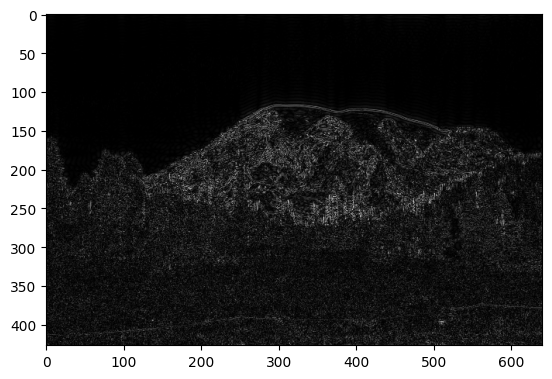

In [32]:
# Calcular filtro pasaalto
pasaalto = np.abs(landscape - reconstructed_landscape)

# Reescalar para poder ver los colores
pasaalto = pasaalto - pasaalto.min()
pasaalto = pasaalto / pasaalto.max() * 255
pasaalto = pasaalto.astype(int)
plt.imshow(pasaalto, cmap='gray')

## Filtro de promedio en 2D

Ahora volveremos a hacer un filtro pasabajo, pero esta vez usando un de promedio. Tomaremos una ventana de 5x5 en el dominio del espacio. Luego, calcularemos la transformada de Fourier de la imagen original y el filtro. Finalmente multiplicaremos ambas transformadas en el dominio de frecuencia para obtener la imagen filtrada.

In [33]:
avg_filter = np.ones((5,5)) / (5*5)
avg_filter

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

In [34]:
A, B = landscape.shape
C, D = avg_filter.shape

P = A + C + 1
Q = B + D + 1

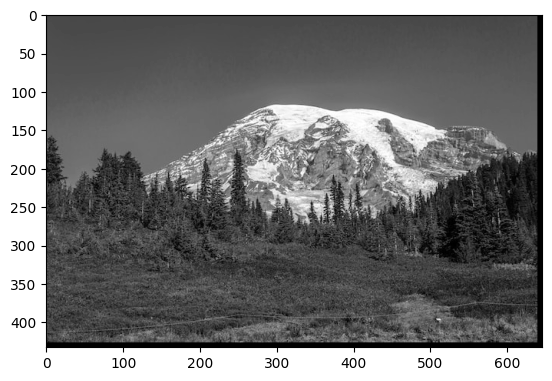

In [35]:
padded_landscape = np.zeros((P, Q))
padded_landscape[:A, :B] = landscape
plt.imshow(padded_landscape, cmap='gray')

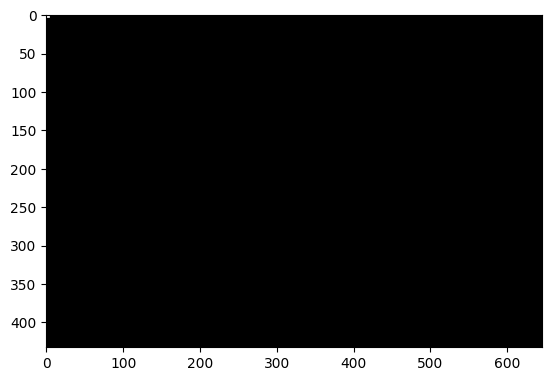

In [36]:
padded_filter = np.zeros((P, Q))
padded_filter[:C, :D] = avg_filter
plt.imshow(padded_filter, cmap='gray')

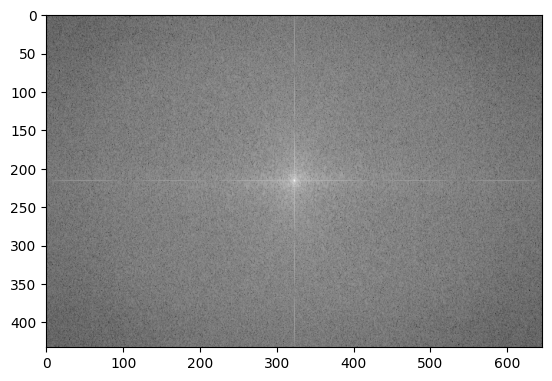

In [37]:
# Transformada de Fourier de la imagen
landscape_fft = np.fft.fftshift(np.fft.fft2(padded_landscape))
plt.imshow(np.log(np.abs(landscape_fft)), cmap='gray')

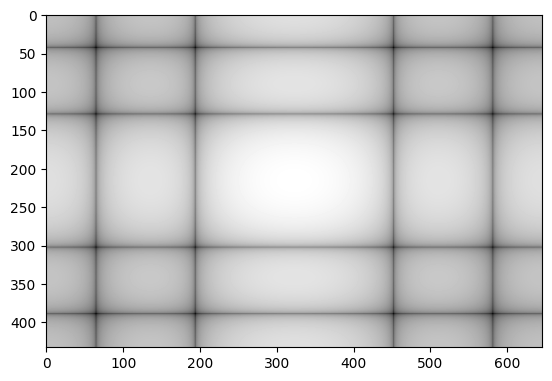

In [38]:
# Transformada de Fourier del filtro
filter_fft = np.fft.fftshift(np.fft.fft2(padded_filter))
plt.imshow(np.log(np.abs(filter_fft)), cmap='gray')

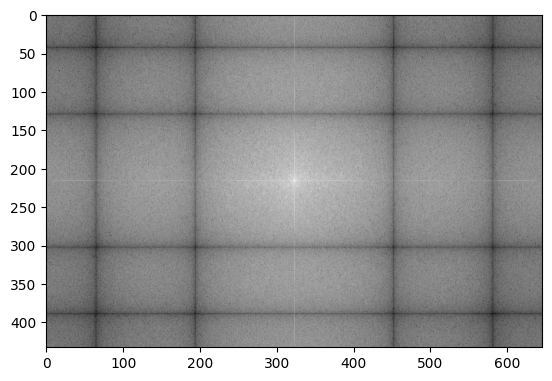

In [39]:
# Multiplicar transformadas para obtener espectro filtrado
landscape_fft_filtered = landscape_fft * filter_fft
plt.imshow(np.log(np.abs(landscape_fft_filtered)), cmap='gray')

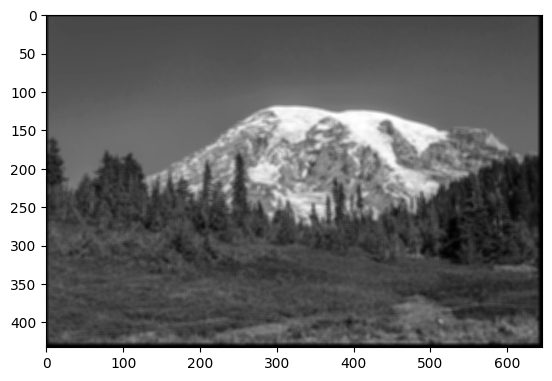

In [46]:
# Des-centrar y aplicar transformada inversa
unshifted_filtered_fft = np.fft.ifftshift(landscape_fft_filtered)
reconstructed_landscape = np.real(np.fft.ifft2(unshifted_filtered_fft))
plt.imshow(reconstructed_landscape, cmap='gray')

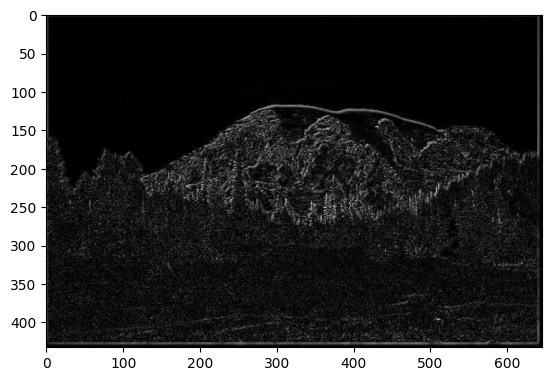

In [41]:
pasaalto = np.abs(padded_landscape - reconstructed_landscape)

# Reescalar para poder ver los colores
pasaalto = pasaalto - pasaalto.min()
pasaalto = pasaalto / pasaalto.max() * 255
pasaalto = pasaalto.astype(int)
plt.imshow(pasaalto, cmap='gray')